# 1 - Importing data:

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_stata('pop.dta')
df = data
g  = data
data.head()
# data.shape
# data.groupby('rowdesc').count()

,address,geocode,hasc,district,rowdesc,year,pop_f,pop_m
0,30,1,IR.AL,Alborz,0 - 4years old,65,79924.0,81598.0
1,30,1,IR.AL,Alborz,10 - 14years old,65,49368.0,53534.0
2,30,1,IR.AL,Alborz,10years old,65,10507.0,11386.0
3,30,1,IR.AL,Alborz,11years old,65,10020.0,10833.0
4,30,1,IR.AL,Alborz,12years old,65,9849.0,10391.0


# 2- Applying some cleaning on data

In [51]:
# g = g[g['rowdesc'].apply(len) == 11]
def clean(txt):
    return txt.replace('years old','')
g['rowdesc'] = g['rowdesc'].apply(clean)
g.rename(columns={'rowdesc':'age'})

g = g.rename(columns={'rowdesc':'age'})
g = g.rename(columns={'district':'ostan'})
g.head()
# g.rowdesc.apply(clean)


,address,geocode,hasc,ostan,age,year,pop_f,pop_m
0,30,1,IR.AL,Alborz,0 - 4,65,79924.0,81598.0
1,30,1,IR.AL,Alborz,10 - 14,65,49368.0,53534.0
2,30,1,IR.AL,Alborz,10,65,10507.0,11386.0
3,30,1,IR.AL,Alborz,11,65,10020.0,10833.0
4,30,1,IR.AL,Alborz,12,65,9849.0,10391.0


In [57]:
g = g[g.age.str.len() <= 2]

# 3 - Select columns that is need

In [58]:
g = g[['ostan' , 'age','year','pop_f','pop_m']]
g = g.melt(id_vars=['ostan' , 'age','year'])
g.head()

,ostan,age,year,variable,value
0,Alborz,10,65,pop_f,10507.0
1,Alborz,11,65,pop_f,10020.0
2,Alborz,12,65,pop_f,9849.0
3,Alborz,13,65,pop_f,9526.0
4,Alborz,14,65,pop_f,9466.0


# 4- Anymore cleaning on data

In [59]:
g['variable'] = g['variable'].apply(lambda x: 'male' if x == 'pop_m' else 'female')
g = g.rename(columns={'variable':'gender','value':'population'})
g.tail()


,ostan,age,year,gender,population
145819,Alborz,82,92,male,1000.0
145820,Alborz,83,91,male,1013.0
145821,Alborz,83,92,male,1069.0
145822,Alborz,84,91,male,868.0
145823,Alborz,84,92,male,929.0


# 5- Apply groupping on dataframe

In [60]:
import numpy as np
# np.sum()
d = g.groupby(['ostan','year','age','gender'])
# d.agg(np.sum)
d = d.sum()


In [61]:
d.iloc[d.index.get_level_values('ostan')=='Tehran']

population
ostan  year age gender            
Tehran 65   1   female    112227.0
                male      116961.0
            10  female     72464.0
                male       76607.0
            11  female     68855.0
                male       72055.0
            12  female     67008.0
                male       72009.0
            13  female     66304.0
                male       70178.0
            14  female     67348.0
                male       72728.0
            15  female     70518.0
                male       76144.0
            16  female     68316.0
                male       73093.0
            17  female     71329.0
                male       74975.0
            18  female     73252.0
                male       74120.0
            19  female     71520.0
                male       70097.0
            2   female    116954.0
                male      120420.0
            20  female     76606.0
                male       72890.0
            21  female     69391.0
                male       68101.0
            22  female     71989.0
                male       71717.0
...                            ...
       92   72  female     18407.0
                male       22445.0
            73  female     19674.0
                male       18687.0
            74  female     17631.0
                male       20840.0
            75  female     15426.0
                male       20029.0
            76  female     17188.0
                male       17092.0
            77  female     18079.0
                male       17816.0
            78  female     17183.0
                male       15911.0
            79  female     13533.0
                male       14363.0
            8   female     71974.0
                male       75646.0
            80  female     12919.0
                male       12801.0
            81  female     14949.0
                male        9294.0
            82  female     11819.0
                male        7107.0
            83  female      8347.0
                male        7546.0
            84  female      8292.0
                male        6034.0
            9   female     69595.0
                male       73331.0

[4704 rows x 1 columns]

In [62]:
g.groupby('ostan').count().index

Index(['Alborz', 'Ardabil', 'Azerbaijan, East', 'Azerbaijan, West', 'Bushehr',
       'Chahar Mahaal and Bakhtiari', 'Fars', 'Gilan', 'Golestan', 'Hamadan',
       'Hormozgan', 'Ilam', 'Isfahan', 'Kerman', 'Kermanshah',
       'Khorasan, North', 'Khorasan, Razavi', 'Khorasan, South', 'Khuzestan',
       'Kohgiluyeh and Boyer-Ahmad', 'Kordestan', 'Lorestan', 'Markazi',
       'Mazandaran', 'Qazvin', 'Qom', 'Semnan', 'Sistan and Baluchistan',
       'Tehran', 'Yazd', 'Zanjan'],
      dtype='object', name='ostan')

In [63]:
ostan ={ 'البرز':'Alborz'
, 'اردبيل':'Ardabil'
, 'آذربايجان شرقي':'Azerbaijan-East'
, 'آذربايجان غربي':'Azerbaijan-West'
, 'بوشهر':'Bushehr'
, 'چهارمحال وبختيارئ':'Chahar Mahaal and Bakhtiari'
, 'فارس':'Fars'
, 'گيلان':'Gilan'
, 'گلستان':'Golestan'
, 'همدان':'Hamadan'
, 'هرمزگان':'Hormozgan'
, 'ايلام':'Ilam'
, 'اصفهان':'Isfahan'
, 'كرمان':'Kerman'
, 'كرمانشاه':'Kermanshah'
, 'خراسان شمالي':'Khorasan, North'
, 'خراسان رضوئ':'Khorasan, Razavi'
, 'خراسان جنوبي':'Khorasan, South'
, 'خوزستان':'Khuzestan'
, 'كهگيلويه وبويراحمد':'Kohgiluyeh and Boyer-Ahmad'
, 'كردستان':'Kordestan'
, 'لرستان':'Lorestan'
, 'مركزئ':'Markazi'
, 'مازندران':'Mazandaran'
, 'قزوين':'Qazvin'
, 'قم':'Qom'
, 'سمنان':'Semnan'
, 'سيستان وبلوچستان':'Sistan and Baluchistan'
, 'تهران':'Tehran'
, 'يزد':'Yazd'
, 'زنجان':'Zanjan'
}

Text(0, 0.5, 'population')

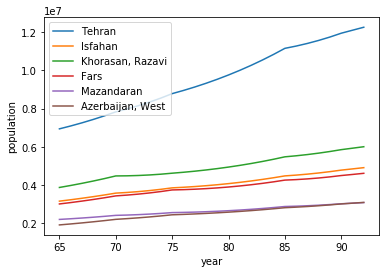

In [64]:
t = g[g['ostan']=='Tehran'].groupby('year').sum()
t1 = g[g['ostan']=='Isfahan'].groupby('year').sum()
t2 = g[g['ostan']=='Khorasan, Razavi'].groupby('year').sum()
t3 = g[g['ostan']=='Fars'].groupby('year').sum()
t4 = g[g['ostan']=='Mazandaran'].groupby('year').sum()
t5 = g[g['ostan']=='Azerbaijan, West'].groupby('year').sum()
plt.plot(t)
plt.plot(t1)
plt.plot(t2)
plt.plot(t3)
plt.plot(t4)
plt.plot(t5)
plt.legend(['Tehran','Isfahan','Khorasan, Razavi','Fars','Mazandaran','Azerbaijan, West'])
plt.xlabel('year')
plt.ylabel('population')

In [74]:
h = g.groupby('ostan').sum()
g
# h.sort(['population'])
g.to_csv('population/s.csv')

In [75]:
g.age = g.age.astype(int)

In [76]:
g.groupby('age').sum()

,year,population
age,,
1,136276.0,35848560.0
2,136276.0,37729124.0
3,136276.0,38161504.0
4,136276.0,39201964.0
5,136276.0,40459292.0
6,136276.0,40489104.0
7,136276.0,40168592.0
8,136276.0,39455244.0
9,136276.0,38845148.0


In [73]:
# g[g.age < 10]

In [69]:
g.age.astype(int)

0         10
1         11
2         12
3         13
4         14
5         15
6         16
7         17
8         18
9         19
10         1
11        20
12        21
13        22
14        23
15        24
16        25
17        26
18        27
19        28
20        29
21         2
22        30
23        31
24        32
25        33
26        34
27        35
28        36
29        37
          ..
145794    70
145795    70
145796    71
145797    71
145798    72
145799    72
145800    73
145801    73
145802    74
145803    74
145804    75
145805    75
145806    76
145807    76
145808    77
145809    77
145810    78
145811    78
145812    79
145813    79
145814    80
145815    80
145816    81
145817    81
145818    82
145819    82
145820    83
145821    83
145822    84
145823    84
Name: age, Length: 145824, dtype: int64